In [1]:
import numpy as np
from nn.nn import NeuralNetwork
import nn.io as io
import nn.preprocess as preprocess
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# read in the data
positive_seqs = io.read_text_file("./data/rap1-lieb-positives.txt")
negative_seqs = io.read_fasta_file('./data/yeast-upstream-1k-negative.fa')

neg_seqs_trunc = [seq[:len(positive_seqs[0])] for seq in negative_seqs]
seqs = positive_seqs + neg_seqs_trunc
labels = [1] * len(positive_seqs) + [0] * len(neg_seqs_trunc)

# randomly sample with replacement from each group to balance the sample numbers. Oversamples the smaller group
sampled_seqs, sampled_labels = preprocess.sample_seqs(seqs, labels)

#one hot encode them
one_hot_seqs = preprocess.one_hot_encode_seqs(sampled_seqs)

#split into train and test
X_train, X_val, y_train, y_val = train_test_split(one_hot_seqs, sampled_labels, test_size = .2, random_state = 23)
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [3]:
print(X_train.shape)
print(y_train.shape)

(5060, 68)
(5060,)


In [5]:
X_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [21]:
# setup classifier
from nn.nn import NeuralNetwork
# set up the NN
nn_arch = [
    {'input_dim': 68, 'output_dim': 30, 'activation': 'relu'},
    {'input_dim': 30, 'output_dim': 1, 'activation': 'relu'},
]

nnetwork = NeuralNetwork(nn_arch= nn_arch, lr = .0001, seed = 23, batch_size = 50, epochs = 500, loss_function = "_binary_cross_entropy")

In [22]:
#train
per_epoch_loss_train, per_epoch_loss_val = nnetwork.fit(np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val))

epoch 0 out of 500
epoch 100 out of 500
epoch 200 out of 500
epoch 300 out of 500
epoch 400 out of 500


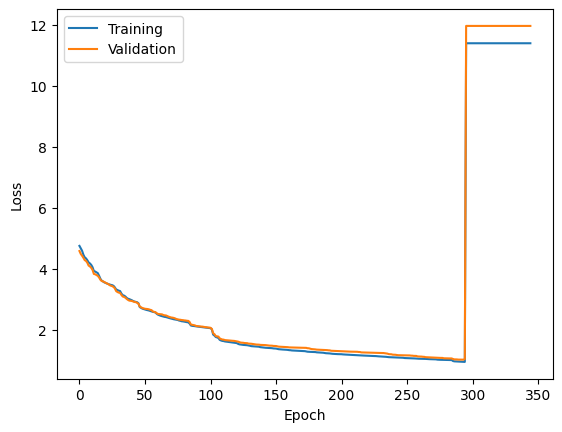

In [23]:
#plot
plt.plot(per_epoch_loss_train, label = 'Training')
plt.plot(per_epoch_loss_val, label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# validation accuracy of the classifier
per_epoch_loss_val[294]

1.0405903529148763

In [ ]:
# explanation of loss function and hyperparameters
# I chose binary cross entropy loss because it works well as a loss function for a binary classifier
# I chose numbers of parameters to end up with 1 dimension - the classification
# I tried with more layers but it had much worse accuracy
# I also tried with the sigmoid activation in the last lair and that made the loss go up over time
# not sure why there is a huge spike in loss at epoch 295. I would investigate this more if I had more time